
# Project: No-show appointments data analysis

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction
In this project we will analyze data associated with medical appointments of brazil patients.In particular, we will be investigating the trends of patients who show up for appointments and how they differ from patients who dont show up for their appointments.

### Dataset Description 
This dataset includes data from 100k of medical appointments in brazil.Columns contained in the dataset include; gender, patientId, appointmentId, scheduled day(tells us on what day the patient set up their appointment), appointmentday, age, neighborhood(indicates the location of the hospital), scholarship(indicates whether or not the patient is enrolled in Brasilian welfare program Bolsa Família), Hipertension, Diabetes, Alcoholism, handcap, Sms_received, no-show(indicates whether a patient showed up for an appointment).

### Question(s) for Analysis
What factors are important for us to know in order to predict if a patient will show up for their scheduled appointment?

In [1]:
# import packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


%matplotlib inline

<a id='wrangling'></a>
## Data Wrangling

In [2]:
# Load our data 
df=pd.read_csv('/Users/kibo/Desktop/project1 Investigate dataset/noshowappointments-kagglev2-may-2016 (1).csv')
df.head()



,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No



### Data Cleaning
In this phase we will be cleaning the csv data  that has wrong datatypes/format or missing values.In particular , the appointment day column has a time day format, since we only require the day and not the time , we will tend to strip its format to a date string.
 

In [3]:
# Get info on the csv
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


The data shows there are no missing values.
Patiend id is a float datatype.It will be easy to handle patient ids as int datatypes.
All object datatypes should converted into strings.

In [4]:
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


In [5]:
#change the datetime format for appointment day and schedule day to date format
df['AppointmentDay'] = pd.to_datetime(df['AppointmentDay']).dt.normalize()
df['ScheduledDay'] = pd.to_datetime(df['ScheduledDay']).dt.normalize()

In [6]:
#check to see changes
df.head(2)

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29 00:00:00+00:00,2016-04-29 00:00:00+00:00,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29 00:00:00+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,0,0,0,0,0,No


In [7]:
# converting the patientid to an int to remove the exponential
df['PatientId'] = df['PatientId'].astype(int)
df.head(2)

c:\Users\kibo\AppData\Local\Programs\Python\Python311\Lib\site-packages\pandas\core\dtypes\astype.py:189: RuntimeWarning: invalid value encountered in cast
  return values.astype(dtype, copy=copy)


,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,-2147483648,5642903,F,2016-04-29 00:00:00+00:00,2016-04-29 00:00:00+00:00,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,-2147483648,5642503,M,2016-04-29 00:00:00+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,0,0,0,0,0,No


In [8]:
# change the no show column to values for easier plotting.
# 1 reperesents Yes and 0 represents No

df.loc[df['No-show'] == "Yes", 'No-show'] = 1
df.loc[df['No-show'] == "No", 'No-show'] = 0
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,-2147483648,5642903,F,2016-04-29 00:00:00+00:00,2016-04-29 00:00:00+00:00,62,JARDIM DA PENHA,0,1,0,0,0,0,0
1,-2147483648,5642503,M,2016-04-29 00:00:00+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,0,0,0,0,0,0
2,-2147483648,5642549,F,2016-04-29 00:00:00+00:00,2016-04-29 00:00:00+00:00,62,MATA DA PRAIA,0,0,0,0,0,0,0
3,-2147483648,5642828,F,2016-04-29 00:00:00+00:00,2016-04-29 00:00:00+00:00,8,PONTAL DE CAMBURI,0,0,0,0,0,0,0
4,-2147483648,5642494,F,2016-04-29 00:00:00+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,1,1,0,0,0,0


<a id='eda'></a>
## Exploratory Data Analysis

In this phase, we will compute the statistics and create visulaizations in relation to the goal of addressing  the stated questions below





### Research Question 1 (what relation does age hold towards patient showing up for an appointment)

In [9]:
# dividing data to people who show up and those who dont show
df_show = df[df['No-show'] == 1]
df_no_show =df[df['No-show'] == 0]
df_show.head(2)

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
6,-2147483648,5630279,F,2016-04-27 00:00:00+00:00,2016-04-29 00:00:00+00:00,23,GOIABEIRAS,0,0,0,0,0,0,1
7,-2147483648,5630575,F,2016-04-27 00:00:00+00:00,2016-04-29 00:00:00+00:00,39,GOIABEIRAS,0,0,0,0,0,0,1


In [10]:
#drop unnecessary columns
df_new_show=df_show.drop(columns=['PatientId', 'AppointmentID', 'ScheduledDay', 'AppointmentDay' ])
df_new_no_show=df_no_show.drop(columns=['PatientId', 'AppointmentID', 'ScheduledDay', 'AppointmentDay'])
df_new_show.head(2)

,Gender,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
6,F,23,GOIABEIRAS,0,0,0,0,0,0,1
7,F,39,GOIABEIRAS,0,0,0,0,0,0,1


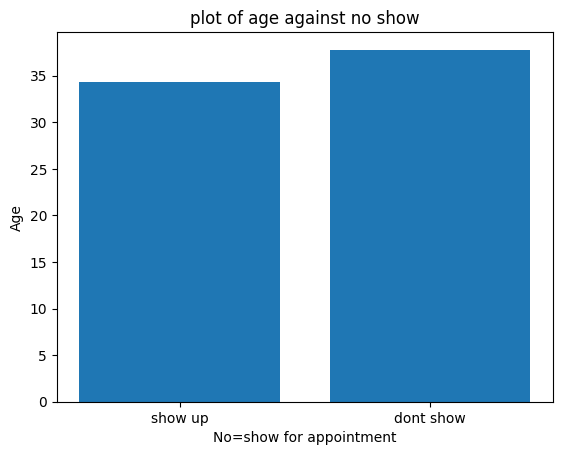

In [66]:
# creating a scatter plot for patients who dont show up
heights = [df_new_show['Age'].mean(), df_new_no_show['Age'].mean()]
labels=['show up', 'dont show']
plt.bar(labels, heights
)
plt.xlabel("No=show for appointment")
plt.ylabel("Age")
plt.title("plot of age against no show")
plt.show()

In [68]:
print(" mean age for patients who show up for an appointment {}".format(df_new_show['Age'].mean().astype(int)))
print(" mean age for patients who  dont show  up for an appointment {}".format(df_new_no_show['Age'].mean().astype(int)))

 mean age for patients who show up for an appointment 34
 mean age for patients who  dont show  up for an appointment 37


patients who age 34 years old are likely to show up for an appointment than those who age 37 years old

### Research Question 2 What other factors  may lead to a patient to show up for an appointment

Do people with scholarships tend to show up for an appointment

In [81]:
#get patients who received scholarships and showed up
df_scholar = df_new_show.query('Scholarship == 1')
df_no_scholar = df_new_show.query('Scholarship == 0')

print("Number of patients with scholarship who showed {}".format(df_scholar['Scholarship'].count()))
print("Number of patients with no scholarship who showed {}".format(df_no_scholar['Scholarship'].count()))



Number of patients with scholarship who showed 2578
Number of patients with no scholarship who showed 19741


Text(0, 0.5, 'number of patients with / without scholarship')

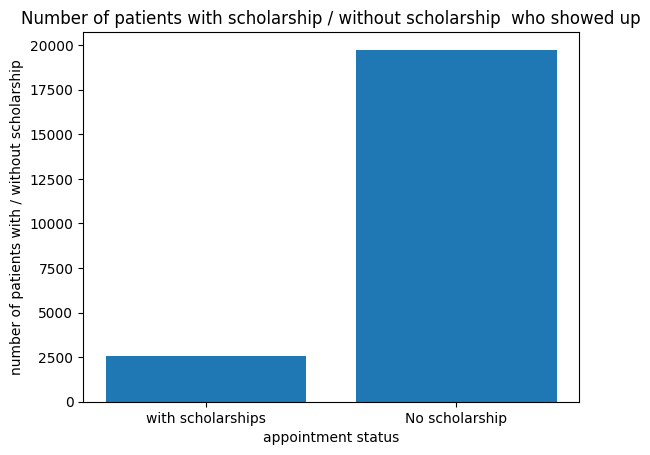

In [82]:
#plot of number of males and female who showed
locations=["with scholarships", "No scholarship"]
heights=[df_scholar['Scholarship'].count(), df_no_scholar['Scholarship'].count() ]
plt.bar(locations, heights)
plt.title("Number of patients with scholarship / without scholarship  who showed up")
plt.xlabel("appointment status")
plt.ylabel("number of patients with / without scholarship")

According to these visuals , patients with no scholarships tend to show up for an appointment than those with the scholarship.

In [53]:
# plot of sms_received against no-show
df_new_show.query('SMS_received == 0').mean()


C:\Users\kibo\AppData\Local\Temp\ipykernel_10932\3580583020.py:2: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_new_show.query('SMS_received == 0').mean()


Age             34.642920
Scholarship      0.111209
Hipertension     0.177663
Diabetes         0.070682
Alcoholism       0.031911
Handcap          0.024412
SMS_received     0.000000
No-show          1.000000
dtype: float64

### Research Question 2 what relation does gender have to patient showing up for an appointment(do men show up than women or vice versa)

In [56]:
#df_new_show - includes data of patient who made to the appointment
#firts query-get the mean of females who showed up
females_who_showed = df_new_show[df_new_show['Gender'] == "F"]
females_sum= females_who_showed['Gender'].count()

# second query- get mean of males who showed up
males_who_showed = df_new_show[df_new_show['Gender'] == "M"]
males_sum= males_who_showed['Gender'].count()

print("Number of females who showed : {}".format(females_sum))
print("Number of males who showed : {}".format(males_sum))

Number of females who showed : 14594
Number of males who showed : 7725


Text(0, 0.5, 'number of males and females')

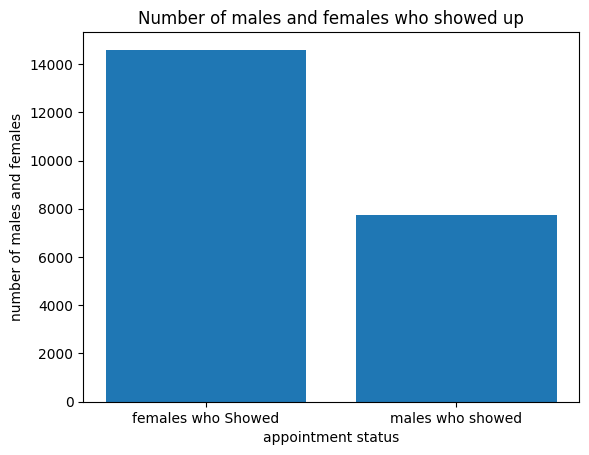

In [57]:
#plot of number of males and female who showed
loactions=["females who Showed", "males who showed"]
heights=[females_sum, males_sum]
plt.bar(loactions, heights)
plt.title("Number of males and females who showed up")
plt.xlabel("appointment status")
plt.ylabel("number of males and females")

Generally females tend to show up more than males.

In [93]:
# determining the correlation of factors for patients who showed up

df_new_show.corr()

C:\Users\kibo\AppData\Local\Temp\ipykernel_10932\1660574605.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_new_show.corr()


,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
Age,1.000000,-0.079770,0.521557,0.306683,0.099859,0.081480,-0.016760
Scholarship,-0.079770,1.000000,-0.023824,-0.024142,0.057870,-0.020870,0.015221
Hipertension,0.521557,-0.023824,1.000000,0.439078,0.090336,0.085808,-0.026152
Diabetes,0.306683,-0.024142,0.439078,1.000000,0.016668,0.044351,-0.030558
Alcoholism,0.099859,0.057870,0.090336,0.016668,1.000000,-0.002903,-0.010413
Handcap,0.081480,-0.020870,0.085808,0.044351,-0.002903,1.000000,-0.029730
SMS_received,-0.016760,0.015221,-0.026152,-0.030558,-0.010413,-0.029730,1.000000


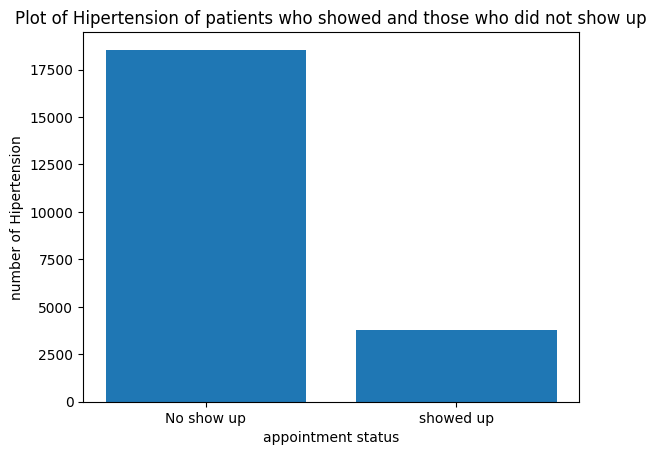

number of patients without Hipertension is 18547
number of patients with Hipertension is 3772


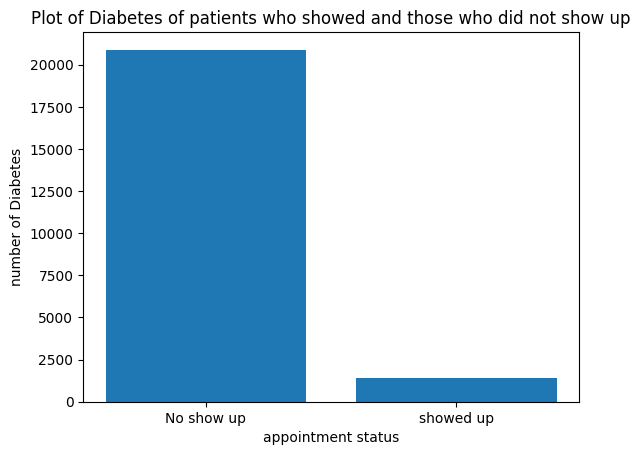

number of patients without Diabetes is 20889
number of patients with Diabetes is 1430


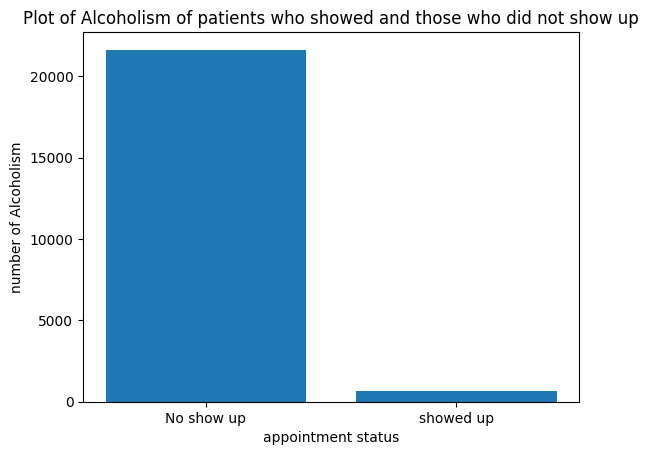

number of patients without Alcoholism is 21642
number of patients with Alcoholism is 677


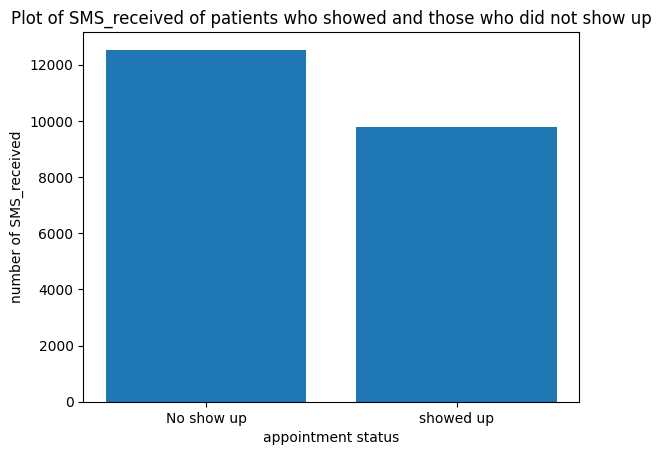

number of patients without SMS_received is 12535
number of patients with SMS_received is 9784


In [100]:
#Analysing other factors
columns = ['Hipertension', 'Diabetes', 'Alcoholism', 'SMS_received']

for c in columns:
    sum1=df_new_show.query(f"{c} == 0")[c].count()
    sum2=df_new_show.query(f"{c} == 1")[c].count()

    locations = ["No show up", "showed up"]
    heights =[sum1, sum2]
    plt.bar(locations, heights)
    plt.title(f"Plot of {c} of patients who showed and those who did not show up")
    plt.xlabel("appointment status")
    plt.ylabel(f"number of {c}")
    plt.show()

    print("number of patients without {} is {}".format(c, sum1))
    print("number of patients with {} is {}".format(c, sum2))


<a id='conclusions'></a>
## Conclusions



Age and gender are important facts in determining if a patient will show up for the appointment.

The other factors depict that a less number of patients show up for an appointment if they were true.

Patients aging 34 years old tend to show up for appointment, while patients aging 37 years old tend to miss appointments.

Females have a high rate of showing up for an appointment compared to males.

In [ ]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])